# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import scipy.stats as stats
import scipy
import warnings
warnings.filterwarnings('ignore')


In [3]:
data= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\stud.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 4.7 Creating 2 new feature 
1. Total Score(sum of 3 score features) 
2. Average score (Average of the Total Score)

In [48]:
data['Total'] = data['math score'] + data['reading score'] + data['writing score']
data['Average'] = data['Total']/3
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### 2 .Hypothesis Testing
#### 2.1 Checking correlation

In [4]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


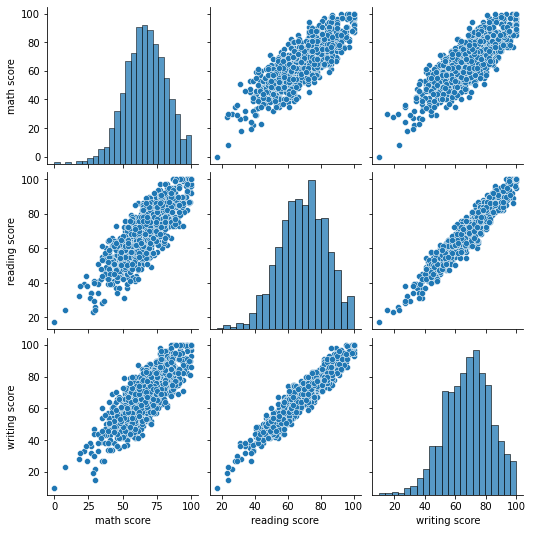

In [5]:
sns.pairplot(data.iloc[:, 4:8])

#### Observations
1. Math, Reading and Writing score data seems to be in linear fashion.
2. Reading and Writing score are highly correlated

#### Seggregating Numerical and Object Features

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_df = data[numeric_features]
categorical_df = data[categorical_features]

#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [26]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in numeric_features:
    dataToTest = numeric_df[column]
    stat,p = shapiro(dataToTest)
    print(f"Stat value for feature {column} is : {stat}")
    print(f"p value for feature {column} is : {p}")
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numeric_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

Stat value for feature math score is : 0.9931505918502808
p value for feature math score is : 0.00014530023327097297
Stat value for feature reading score is : 0.9929210543632507
p value for feature reading score is : 0.0001056220498867333
Stat value for feature writing score is : 0.9919633269309998
p value for feature writing score is : 2.9172901122365147e-05


,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


#### 2.3 K-square Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [25]:
from scipy.stats import normaltest
normaltest_test = []
for column in numeric_features:
    dataToTest = numeric_df[column]
    stat,p = normaltest(dataToTest)
    print(f"Stat value for feature {column} is : {stat}")
    print(f"p value for feature {column} is : {p}")
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numeric_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

Stat value for feature math score is : 15.408960513931822
p value for feature math score is : 0.00045080293869937836
Stat value for feature reading score is : 11.11741279628622
p value for feature reading score is : 0.003853758403576582
Stat value for feature writing score is : 13.606450837263859
p value for feature writing score is : 0.0011101885439899974


,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


#### 2.4 Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

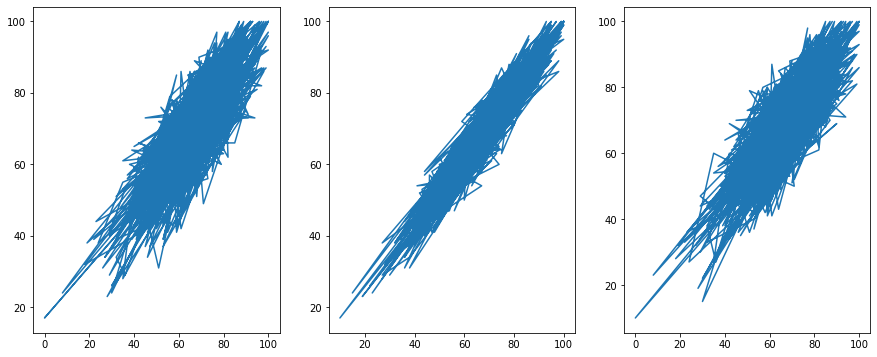

In [40]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 3, 1)
plt.plot(numeric_df['math score'],numeric_df['reading score'])
plt.xlabel ="Math Score"
plt.ylabel = "Reading Score"


plt.subplot(1, 3, 2)
plt.plot(numeric_df['writing score'],numeric_df['reading score'])
plt.subplot(1, 3, 3)
plt.plot(numeric_df['math score'],numeric_df['writing score'])
plt.show()

#### Remarks :
1. We can observe linear relationship amoung two varibales.
2. lets prove it hypothetically too using spearman Rank

In [43]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = numeric_df[column1]
    column2_to_test = numeric_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        d['results'] = "Independent Samples"
    else:
        d['results'] = "Dependent Samples"
    columns_combination.append(d)

In [45]:
columns_combination = []
test_correlation(spearmanr,'math score','reading score')
test_correlation(spearmanr,'writing score','reading score')
test_correlation(spearmanr,'math score','writing score')
df_spearmanr = pd.DataFrame(columns_combination)
df_spearmanr

,col1,col2,results
0,math score,reading score,Dependent Samples
1,writing score,reading score,Dependent Samples
2,math score,writing score,Dependent Samples


### 2.5 pearson Test
    Ho : Independent Samples
    H1 : Dependent Samples

In [47]:
columns_combination = []
test_correlation(pearsonr,'math score','reading score')
test_correlation(pearsonr,'writing score','reading score')
test_correlation(pearsonr,'math score','writing score')
df_pearson = pd.DataFrame(columns_combination)
df_pearson

,col1,col2,results
0,math score,reading score,Dependent Samples
1,writing score,reading score,Dependent Samples
2,math score,writing score,Dependent Samples


#### Remarks :
1. Both Pearson and Spearman proves that Reading, Writing and Math scores features are dependent on each other
- At 5% level of significance
- From above two tests of Pearsonr and Spearmanr , since all the three p-values are more than 0.05.
- Inference: The scores have a correlation between them.

#### 2.6 Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average and Total Score
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [52]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
chi2_p_value = []
for feature in categorical_features:
    stat, p_value , dof, expected = chi2_contingency(pd.crosstab(data['Average'], data[feature]))
    if p_value> 0.05:
        chi2_squared_test.append("Independent Categories")
        chi2_p_value.append(p_value)
        
    else:
        chi2_squared_test.append("Dependent Categories")
        chi2_p_value.append(p_value)
result = pd.DataFrame(data=[categorical_features, chi2_squared_test,chi2_p_value]).T
result.columns = ['Column', 'Hypothesis Result', 'P-Value']
result

,Column,Hypothesis Result,P-Value
0,gender,Independent Categories,0.398826
1,race/ethnicity,Independent Categories,0.0538069
2,parental level of education,Independent Categories,0.165924
3,lunch,Dependent Categories,0.000507596
4,test preparation course,Dependent Categories,0.0163441


In [53]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
chi2_p_value = []
for feature in categorical_features:
    stat, p_value , dof, expected = chi2_contingency(pd.crosstab(data['Total'], data[feature]))
    if p_value> 0.05:
        chi2_squared_test.append("Independent Categories")
        chi2_p_value.append(p_value)
        
    else:
        chi2_squared_test.append("Dependent Categories")
        chi2_p_value.append(p_value)
result = pd.DataFrame(data=[categorical_features, chi2_squared_test,chi2_p_value]).T
result.columns = ['Column', 'Hypothesis Result', 'P-Value']
result

,Column,Hypothesis Result,P-Value
0,gender,Independent Categories,0.398826
1,race/ethnicity,Independent Categories,0.0538069
2,parental level of education,Independent Categories,0.165924
3,lunch,Dependent Categories,0.000507596
4,test preparation course,Dependent Categories,0.0163441


### Remarks
1. Average and Total Score is is dependent on Lunch and Test Preparation Score

#### 2.7 Levene's Test
Equality of variance test

Ho : Female and male have equal variance

H1 : Female and male do not have equal variance

In [58]:
math_var = scipy.stats.levene(data[data['gender']=='female']['math score'],
                  data[data['gender']=='male']['math score'], center = 'mean')
reading_var = scipy.stats.levene(data[data['gender']=='female']['reading score'],
                  data[data['gender']=='male']['reading score'], center = 'mean')
writing_var = scipy.stats.levene(data[data['gender']=='female']['writing score'],
                  data[data['gender']=='male']['writing score'], center = 'mean')
print("Test Statistic and p-value for math  is", math_var)
print('\n')
print("Test Statistic and p-value for writing is", writing_var)
print('\n')
print("Test Statistic and p-value for reading is", reading_var)

Test Statistic and p-value for math  is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test Statistic and p-value for writing is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


Test Statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


#### Remarks
- Conclusion : Since, at 5% level of significance, P(calculated) > P(0.05).
- Therefore we will accept the null hypothesis
- Inference : All the scores have equal variance with respect to gender.

#### 2.8 Checking Correlation using Heatmaps

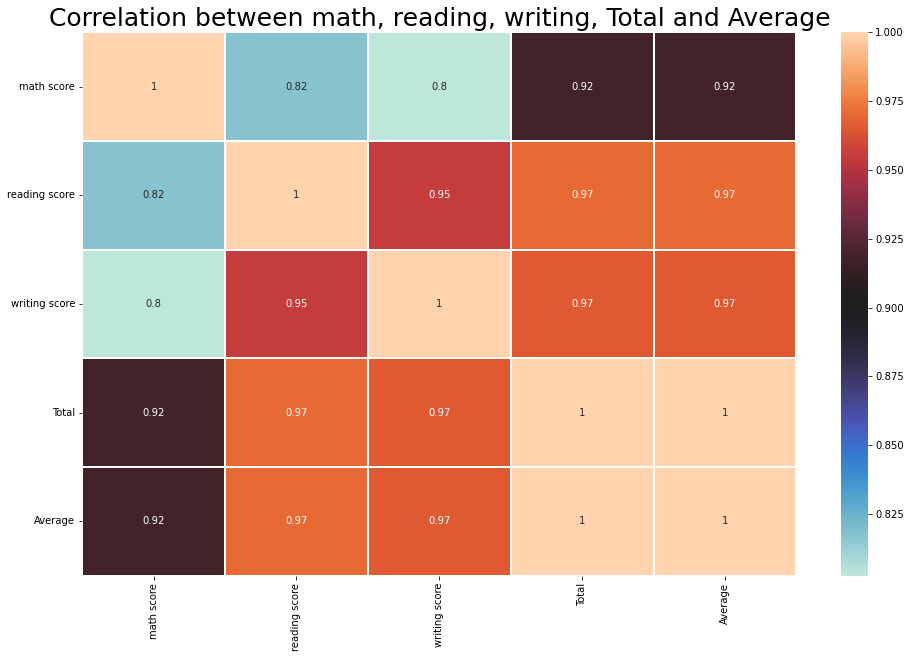

In [67]:
 # Relationship analysis
sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Correlation between math, reading, writing, Total and Average',color='black',size=25)
plt.show()

#### Remarks 
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.

###  3 . Checking for Normal Distribution using Transformations
- Kernel Density plot which is used to check if data is normally distributed or not

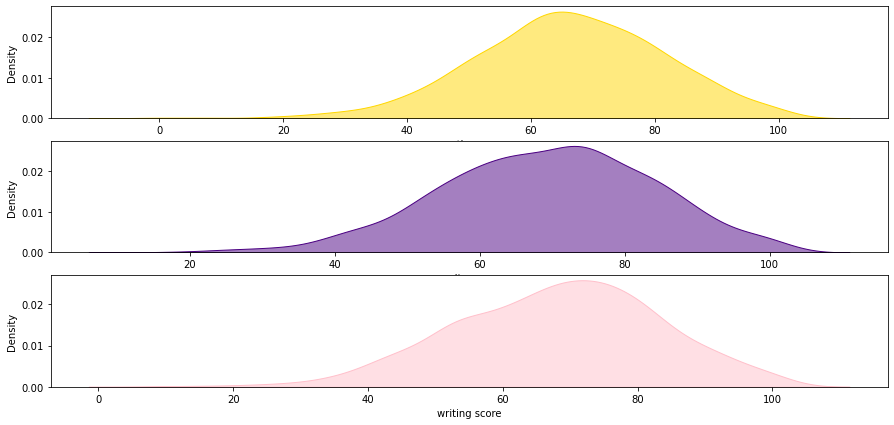

In [68]:
# density plot using seaborn library

fig, axs = plt.subplots(3, 1, figsize=(15, 7))

sns.kdeplot(data['math score'],shade=True,label='Maths',color='gold',ax=axs[0],alpha=0.5)
sns.kdeplot(data['reading score'],shade=True,label='Reading',color='indigo',ax=axs[1],alpha=0.5)
sns.kdeplot(data['writing score'],shade=True,label='Writing',color='pink',ax=axs[2],alpha=0.5)
plt.show()

#### - Q-Q plot/ Quantile-Quantile plot which is used to check if data comes from same distribution

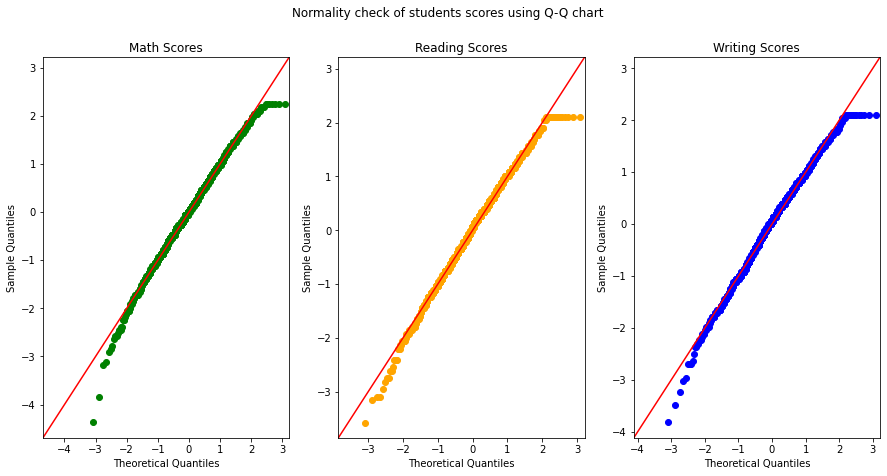

In [82]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7)) 


sm.qqplot(data['math score'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("Math Scores")

sm.qqplot(data['reading score'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("Reading Scores")

sm.qqplot(data['writing score'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("Writing Scores")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

##### Remarks
  - There exists correlation between students scores and the normal distribution line. This means that our data is very close to Gaussian! 

#### 3.1 Log Transform

#### 3.1 Box-Cox Transform
- Assumption -
 * your data must be positive

In [ ]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

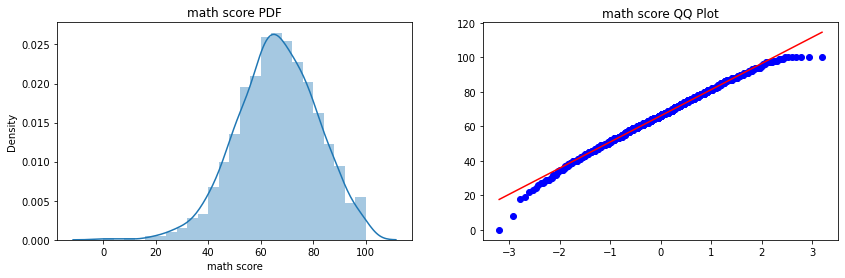

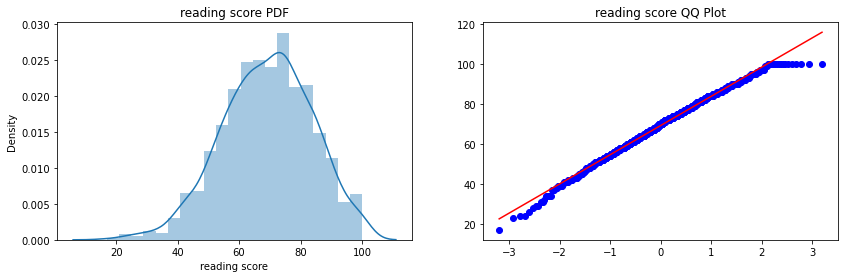

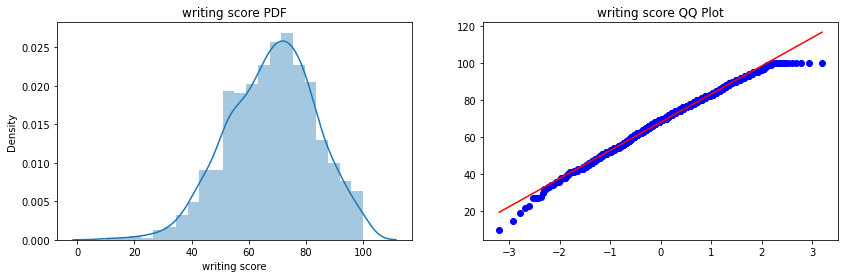

In [80]:
plot_qq_plot('math score')
plot_qq_plot('reading score')
plot_qq_plot('writing score')

#### Remarks
1. For range -2 to 2 math score follows normal distribution, but for values less than -2 and for values greater than 2 it doesn't follow normal distribution